In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def get_df(file_str):
    mf = pd.read_csv(file_str)
    mf['t_diff'] = mf.t.diff()
    mf['success'] = (mf.r > 9000)*1.
    #print(mf.head())
    print(mf.describe())
    print("Mean Reward last 100 Episodes: {}".format(np.mean(mf.r.iloc[-100:])))
    print("Max values:")
    print(mf.r.sort_values(ascending=False)[0:10])
    return mf

def get_scatter_plots(df):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.r,marker='.')
    plt.ylabel('reward')
    plt.xlabel('episode')
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.l,marker='.')
    plt.ylabel('timesteps per episode')
    plt.xlabel('episode')
    plt.show()
    
#     a4_dims = (11.7, 8.27)
#     fig, ax = plt.subplots(figsize=a4_dims)
#     plt.scatter(df.index,df.t_diff,marker='.')
#     plt.ylabel('time per episode')
#     plt.xlabel('episode')
#     plt.show()
    
#     a4_dims = (11.7, 8.27)
#     fig, ax = plt.subplots(figsize=a4_dims)
#     plt.scatter(df.index,df.success,marker='.')
#     plt.ylabel('success')
#     plt.xlabel('episode')
#     plt.show()
    

def get_rolling_plots(df):
    rolling_window_size = 100
    if len(df.r) < 1000:
        rolling_window_size = 50
        
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.r.rolling(rolling_window_size).mean())
    plt.ylabel('reward')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.l.rolling(rolling_window_size).mean())
    plt.ylabel('timesteps')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
#     a4_dims = (11.7, 8.27)
#     fig, ax = plt.subplots(figsize=a4_dims)
#     sns.tsplot(df.t_diff.rolling(rolling_window_size).mean())
#     plt.ylabel('time')
#     plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
#     plt.show()
    
#     a4_dims = (11.7, 8.27)
#     fig, ax = plt.subplots(figsize=a4_dims)
#     sns.tsplot(df.success.rolling(rolling_window_size).mean())
#     plt.ylabel('success')
#     plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
#     plt.show()
    

def get_results(lvl_array):
    for i in lvl_array:
        print(i)
        file_str = '{}/monitor.csv'.format(i)
        df = get_df(file_str)
        print(i)
        get_scatter_plots(df)
        print(i)
        get_rolling_plots(df)
        
def get_level_comparison(lvl_array):
    df_array = []
    for i in range(len(lvl_array)):
        file_str = '{}/monitor.csv'.format(lvl_array[i])
        df_array.append(pd.read_csv(file_str))
        df_array[i]['t_diff'] = df_array[i].t.diff()
        df_array[i]['success'] = (df_array[i].r > 9000)*1.
        print(lvl_array[i])
        print(df_array[i].describe())
        
    get_rolling_comparison(df_array,lvl_array)

    
def plot_rolling_mean(df,col_name,rolling_window_size=100):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df[col_name].rolling(rolling_window_size).mean())
    plt.ylabel(col_name)
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    
def get_rolling_comparison(df_array, lvl_array):
    rolling_window_size = 100
    if len(df_array[0]) < 1000:
        rolling_window_size = 50
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " reward")
        temp_index += 1
        plot_rolling_mean(i,'r',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " success")
        temp_index += 1
        plot_rolling_mean(i,'success',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " timesteps")
        temp_index += 1
        plot_rolling_mean(i,'l',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        a4_dims = (11.7, 8.27)
        fig, ax = plt.subplots(figsize=a4_dims)
        print(lvl_array[temp_index], " reward")
        plt.scatter(i.index,i.r,marker='.')
        plt.ylabel('reward')
        plt.xlabel('episode')
        plt.show()    
        temp_index += 1

logs
                r            l            t      t_diff  success
count  347.000000   347.000000   347.000000  346.000000    347.0
mean    10.143513  1508.080692   756.747724    4.864216      0.0
std     19.275368  1169.620525   455.628059    5.574940      0.0
min     -9.210340   291.000000     1.519481    0.454332      0.0
25%     -4.414550   770.000000   381.816767    1.396432      0.0
50%      4.492115  1213.000000   716.890642    2.329390      0.0
75%     17.483408  1854.000000  1124.778671    6.950330      0.0
max     81.760700  9845.000000  1684.538301   47.787011      0.0
Mean Reward last 100 Episodes: 13.286433880329133
Max values:
90     81.760700
199    78.365963
6      74.648400
129    70.506015
312    69.711382
276    69.050622
168    68.760831
242    68.242517
79     66.872432
332    66.804483
Name: r, dtype: float64
logs


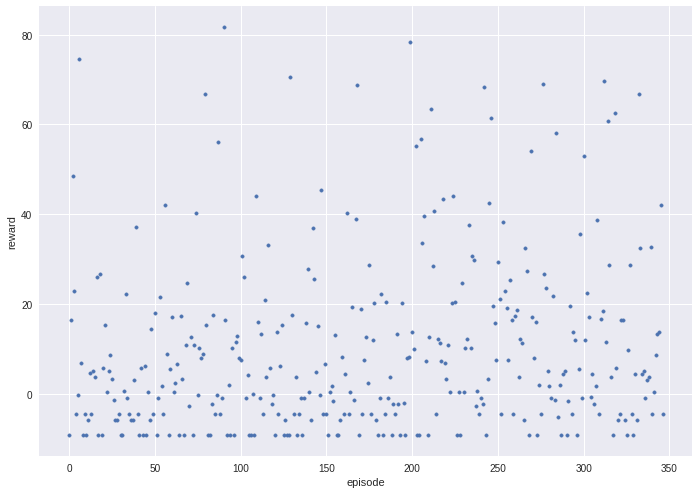

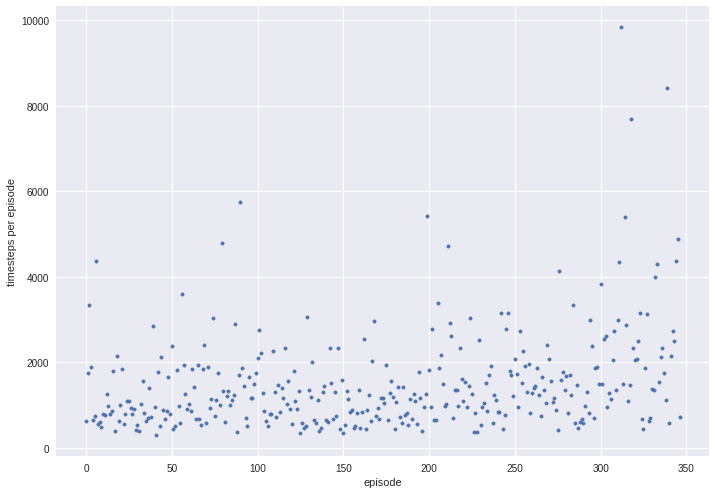

logs


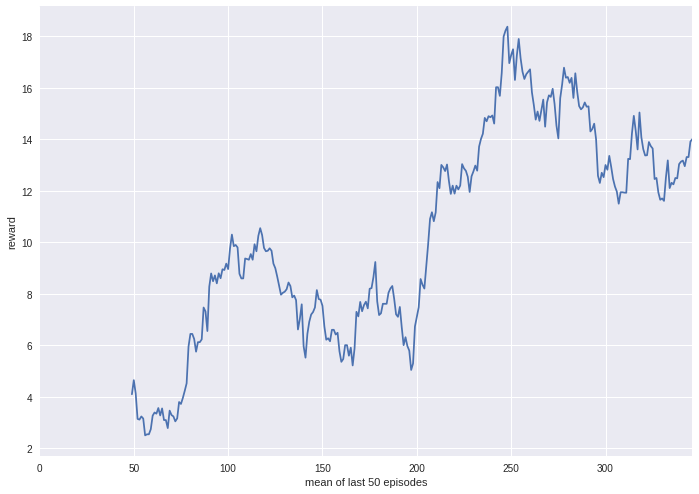

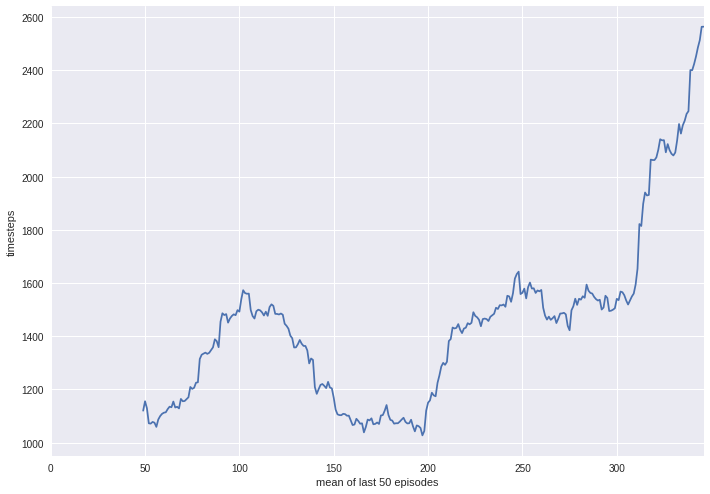

In [4]:
best_run_array = [
    'logs'
]

get_results(best_run_array)

In [5]:
temp = []
temp.append([])
temp.append([])

In [7]:
temp[0].append(5)

In [8]:
temp

[[5], []]